                     company_permalink  \
0                  /organization/-fame   
1               /ORGANIZATION/-QOUNTER   
2               /organization/-qounter   
3  /ORGANIZATION/-THE-ONE-OF-THEM-INC-   
4                /organization/0-6-com   

                           funding_round_permalink funding_round_type  \
0  /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
1  /funding-round/22dacff496eb7acb2b901dec1dfe5633            venture   
2  /funding-round/b44fbb94153f6cdef13083530bb48030               seed   
3  /funding-round/650b8f704416801069bb178a1418776b            venture   
4  /funding-round/5727accaeaa57461bd22a9bdd945382d            venture   

  funding_round_code   funded_at  raised_amount_usd  
0                  B  05-01-2015         10000000.0  
1                  A  14-10-2014                NaN  
2                NaN  01-03-2014           700000.0  
3                  B  30-01-2014          3406878.0  
4                  A  19-03-2008      

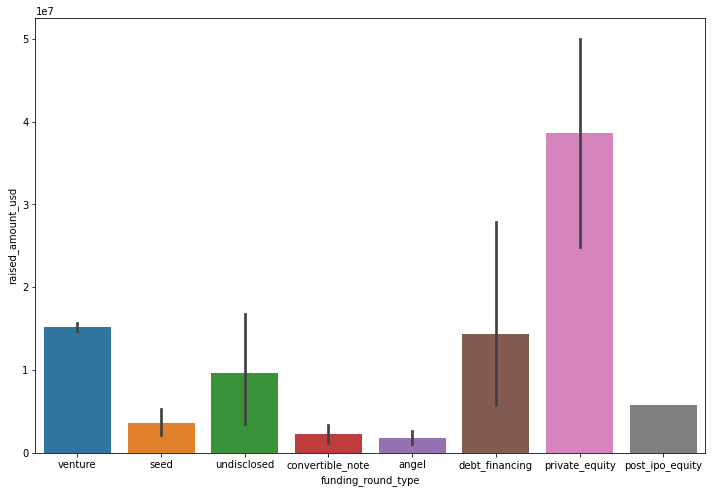

In [150]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



#Load Dataframes
companyDf = pd.read_csv("./companies.csv", encoding = 'unicode_escape')
round2Df = pd.read_csv("./rounds2.csv", encoding = 'unicode_escape')

#Verify Dataframes
print(round2Df.head(5))

#Print Values

print("Number of Unique Companies in Round 2: ",round2Df.company_permalink.nunique(dropna=True))
print("Number of Unique Companies in Companies: ",companyDf.permalink.nunique(dropna=True))

#Convert All UniqueIds to Upper Case, to avoid case mismatch
round2Df["company_permalink"] =  round2Df["company_permalink"].apply(lambda  x : x.upper())
companyDf["permalink"] = companyDf["permalink"].apply(lambda x : x.upper())

#Print the count of values of 0 i.e.. companies which are in round2 but not in companies
print("Number of Companies in round2 but in companies CSV",round2Df["company_permalink"].isin(companyDf["permalink"]).astype(int).value_counts().to_dict())

#Merge Dataframes
master_frame = pd.merge(round2Df,companyDf,left_on='company_permalink',right_on='permalink',how='outer')
print("Master Frame = ",master_frame.head(5))
print("Master Observation = ",master_frame.shape)


#Cleaning of Data
master_frame = master_frame.dropna()
master_frame = master_frame.drop(['funding_round_code','funding_round_permalink','funded_at','permalink','homepage_url','state_code', 'region', 'city','founded_at','status'], axis = 1)
print(master_frame.isnull().sum(axis=0))
print(master_frame.head(5))
#Avg Investment by Rounds
print("Average Funding Investment Median\n",master_frame.groupby('funding_round_type').raised_amount_usd.median())
#master_frame.head(5).plot(kind='bar')
medianMasterDataFrame = master_frame.groupby('funding_round_type').raised_amount_usd.median()
print("median Master DataFrame = ",medianMasterDataFrame.head(5))
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='funding_round_type',y='raised_amount_usd',data=master_frame,ax=ax)

#Country Analysis
top9 = master_frame[master_frame['funding_round_type']=='venture'].groupby('country_code').sum().sort_values('raised_amount_usd', ascending=False)
print("Sorted Values of Country : \n",top9.head(3))

#Sector Analysis


mapping = pd.read_csv('./mapping.csv')
mapping = mapping.dropna()
#Fix Typo in mapping
mapping['category_list'] = mapping['category_list'].apply(lambda x: x.replace('0','na'))
print("mapping['category_list'] = ",mapping[['category_list']].head(5))

mapping = pd.melt(mapping, id_vars =['category_list'], value_vars =['Manufacturing','Automotive & Sports','Cleantech / Semiconductors','Entertainment','Health','News, Search and Messaging','Others','Social, Finance, Analytics, Advertising'])
mapping = mapping[~(mapping.value == 0)]
mapping = mapping.drop('value', axis = 1)
mapping = mapping.rename(columns = {"variable":"main_sector"})

#Get the primary KeyWord for matching
master_frame['category_list'] = master_frame['category_list'].apply(lambda x: x.split('|')[0])
print("master_frame map:\n",mapping.head())
master_frame = master_frame.merge(mapping, how = 'left', on ='category_list')
print("master_frame map:\n",master_frame.head())

#Fetch Dataframes for top 3 countries
master_frame = master_frame[(master_frame['country_code'] == 'USA')| (master_frame['country_code'] == 'GBR')| (master_frame['country_code'] == 'IND')]

master_frame = master_frame.dropna()
print("Net Length",len(master_frame.index))


#Create Required Data Frames:
lowerLimit = 5000000
upperLimit = 15000000






/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


array([<AxesSubplot:title={'center':'None'}, xlabel='None,None,main_sector'>],
      dtype=object)

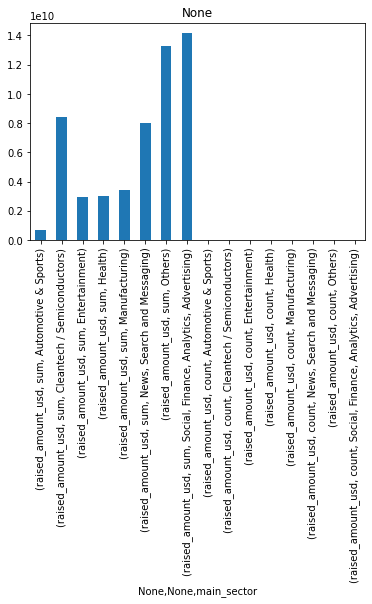

In [151]:

D1 = master_frame[(master_frame['country_code'] == 'USA') & ( master_frame['raised_amount_usd'] > lowerLimit ) & ( master_frame['raised_amount_usd'] < upperLimit )]
d1Group = D1[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count'])
D1 = D1.merge(d1Group, how='left', on ='main_sector')

D1.head()
d1Group.unstack(level=-1).plot(kind='bar', subplots=True)



D1.raised_amount_usd.count 6005
D2.raised_amount_usd.count 276
D3.raised_amount_usd.count 149
D1.raised_amount_usd.sum 54031752068.0
D2.raised_amount_usd.sum 2472516610.0
D3.raised_amount_usd.sum 1305671777.0
D1Group                                         raised_amount_usd      
                                                      sum count
main_sector                                                    
News, Search and Messaging                   8.029842e+09   911
Others                                       1.327725e+10  1468
Social, Finance, Analytics, Advertising      1.417155e+10  1620
D2Group                                         raised_amount_usd      
                                                      sum count
main_sector                                                    
News, Search and Messaging                    335226744.0    37
Others                                        552088395.0    61
Social, Finance, Analytics, Advertising       661027784.0    79
D3Group

/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


array([<AxesSubplot:title={'center':'None'}, xlabel='None,None,main_sector'>],
      dtype=object)

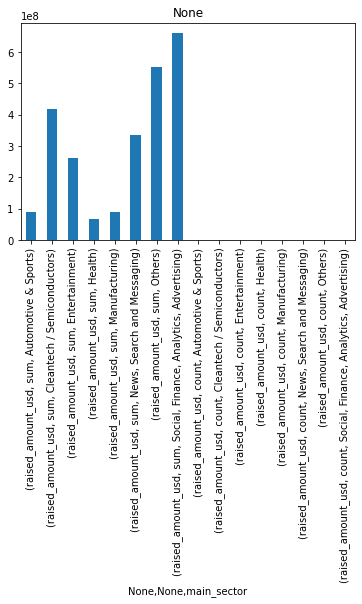

In [157]:
D2 = master_frame[(master_frame['country_code'] == 'GBR') & ( master_frame['raised_amount_usd'] > lowerLimit ) & ( master_frame['raised_amount_usd'] < upperLimit )]
d2Group = D2[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count'])
D2 = D2.merge(d2Group, how='left', on ='main_sector')
D2.head()

D3 = master_frame[(master_frame['country_code'] == 'IND') & ( master_frame['raised_amount_usd'] > lowerLimit) & ( master_frame['raised_amount_usd'] < upperLimit )]
d3Group = D3[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum','count'])
D3 = D3.merge(d3Group, how='left', on ='main_sector')
D3.head()

print("D1.raised_amount_usd.count",D1.raised_amount_usd.count())
print("D2.raised_amount_usd.count",D2.raised_amount_usd.count())
print("D3.raised_amount_usd.count",D3.raised_amount_usd.count())

print('D1.raised_amount_usd.sum',D1.raised_amount_usd.sum())
print('D2.raised_amount_usd.sum',D2.raised_amount_usd.sum())
print('D3.raised_amount_usd.sum',D3.raised_amount_usd.sum())

print("D1Group",d1Group.tail(3))
print("D2Group",d2Group.tail(3))
print("D3Group",d3Group.tail(3))

d2Group.unstack(level=1).plot(kind='bar', subplots=True)


array([<AxesSubplot:title={'center':'None'}, xlabel='None,None,main_sector'>],
      dtype=object)

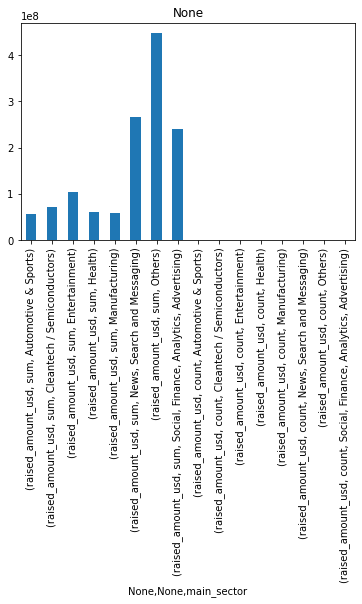

In [153]:
d3Group.unstack(level=-1).plot(kind='bar', subplots=True)

Highest in USA:                        raised_amount_usd
company_permalink                       
/ORGANIZATION/NETBASE         55600000.0
Second Highest in USA:                                  raised_amount_usd
company_permalink                                 
/ORGANIZATION/AIRTIGHT-NETWORKS         46750000.0
Highest in GBR:                                      raised_amount_usd
company_permalink                                     
/ORGANIZATION/CELLTICK-TECHNOLOGIES         37500000.0
Second Highest in GBR:                               raised_amount_usd
company_permalink                              
/ORGANIZATION/ELECTRIC-CLOUD         37000000.0
Highest in IND:                           raised_amount_usd
company_permalink                          
/ORGANIZATION/BANKBAZAAR         19000000.0
Second Highest in IND:                       raised_amount_usd
company_permalink                      
/ORGANIZATION/MYNTRA         33000000.0


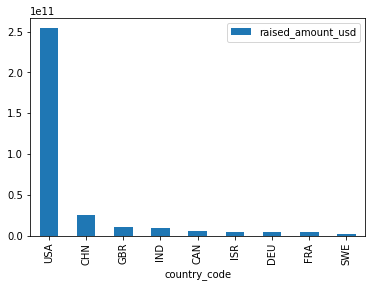

In [154]:
top9.head(9).plot.bar(stacked=True )
#Fetch the company who received highest investement in Best Sector in USA
company = D1[D1['main_sector']=='Social, Finance, Analytics, Advertising']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print("Highest in USA:",company.head(1))

#Fetch the company who received  highest investement in Second best sector in USA
company = D1[D1['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print("Second Highest in USA:",company.head(1))

#Fetch the company who received highest investement in Best Sector in  CHN
company = D2[D2['main_sector']=='Social, Finance, Analytics, Advertising']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print("Highest in GBR:",company.head(1))

#Fetch the company who received Second highest investement in Second Best Sector in  CHN
company = D2[D2['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print("Second Highest in GBR:",company.head(1))

#Fetch the company who received highest investement in Best Sector in  GBR
company = D3[D3['main_sector']=='Social, Finance, Analytics, Advertising']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print("Highest in IND:",company.head(1))

#Fetch the company who received Second highest investement in Second Best Sector in  GBR
company = D3[D3['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print("Second Highest in IND:",company.head(1))



In [155]:
d1Group.to_csv('d1.csv')
d2Group.to_csv('d2.csv')
d3Group.to_csv('d3.csv')
updated1Group = pd.read_csv('d1.csv', skiprows=[0,1,2,3],names=["main_sector", "totalAmount", "totalSum"])
updated1Group = updated1Group.drop(['totalAmount'], axis=1)
updated1Group['country'] = updated1Group.apply(lambda x: 'USA',axis =1)
print("updatedd1Group",updated1Group)
updated2Group = pd.read_csv('d2.csv', skiprows=[0,1,2,3],names=["main_sector", "totalAmount", "totalSum"])
updated2Group = updated2Group.drop(['totalAmount'], axis=1)
updated2Group['country'] = updated2Group.apply(lambda x: 'GBR',axis =1)
print("updatedd2Group",updated2Group)
updated3Group = pd.read_csv('d3.csv', skiprows=[0,1,2,3],names=["main_sector", "totalAmount", "totalSum"])
updated3Group = updated3Group.drop(['totalAmount'], axis=1)
updated3Group['country'] = updated3Group.apply(lambda x: 'IND',axis =1)
print("updatedd3Group",updated3Group)

updatedd1Group                                main_sector  totalSum country
0               Cleantech / Semiconductors       892     USA
1                            Entertainment       343     USA
2                                   Health       319     USA
3                            Manufacturing       377     USA
4               News, Search and Messaging       911     USA
5                                   Others      1468     USA
6  Social, Finance, Analytics, Advertising      1620     USA
updatedd2Group                                main_sector  totalSum country
0               Cleantech / Semiconductors        45     GBR
1                            Entertainment        30     GBR
2                                   Health         6     GBR
3                            Manufacturing         9     GBR
4               News, Search and Messaging        37     GBR
5                                   Others        61     GBR
6  Social, Finance, Analytics, Advertising        79   

                               main_sector  totalSum country
4               News, Search and Messaging       911     USA
5                                   Others      1468     USA
6  Social, Finance, Analytics, Advertising      1620     USA
4               News, Search and Messaging        37     GBR
5                                   Others        61     GBR
6  Social, Finance, Analytics, Advertising        79     GBR
4               News, Search and Messaging        30     IND
5                                   Others        52     IND
6  Social, Finance, Analytics, Advertising        28     IND


/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


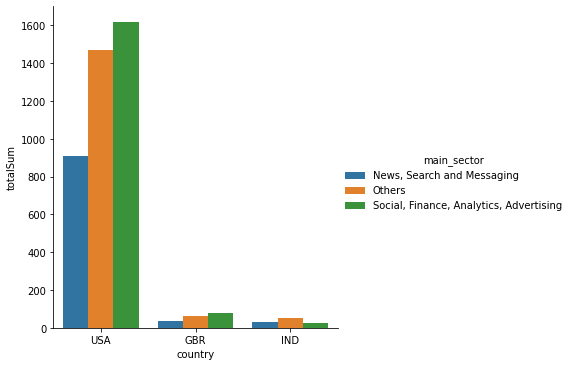

In [156]:

#Reshape DataFrame
newDf = pd.concat([updated1Group.tail(3),updated2Group.tail(3),updated3Group.tail(3)])
print (newDf)
#df1 = pd.melt(newDf, id_vars="country", var_name="main_sector", value_name="totalSum")
#df1.head(5)
sns.factorplot(x='country', y='totalSum', hue='main_sector', data=newDf, kind='bar')

